ANN

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns

# Styling used for VSCode
from matplotlib import style
style.use('dark_background')

data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')



In [54]:
#check for completeness of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

<AxesSubplot:>

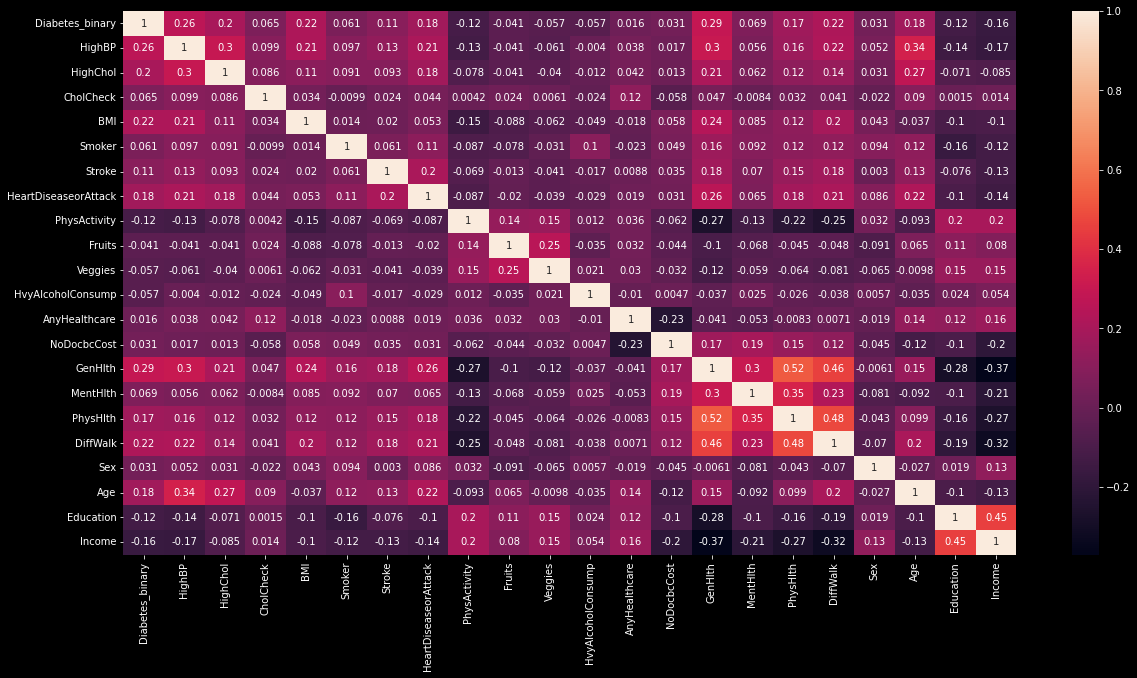

In [55]:
f, ax = plt.subplots(1, figsize=(20,10))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [56]:
# Generate dependent variable and # Generate matrix of features
X = data.iloc[:,1:-1]
y = data.iloc[:,0]

from sklearn import metrics, preprocessing
scaledX = preprocessing.normalize(X, axis=1)
X = pd.DataFrame(scaledX, columns=X.columns)


In [57]:
'''Splitting dataset into training and testing dataset''' 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [46]:
# NN

Optimizers = 'Adam'
LossFunctions = 'binary_crossentropy'
LearningRates = 0.001
MaxEpochs = 100
NodeCount1 = 8
# NodeCount2 = 7
# NodeCount3 = 3
batchSize = 32

                        
optimizer_ =  tf.keras.optimizers.Adam(learning_rate=LearningRates)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=NodeCount1,activation="relu", input_shape = (20,)))
ann.add(tf.keras.layers.Dense(units=NodeCount1,activation="relu"))

ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

'''Compiling ANN'''
ann.compile(optimizer=optimizer_, loss=LossFunctions, metrics=['accuracy'])
history = ann.fit(x=X_train,y=y_train, validation_data=(X_valid, y_valid), batch_size = batchSize, epochs = MaxEpochs)
# , validation_data=[X_valid, y_valid]

from sklearn.metrics import accuracy_score
y_pred = ann.predict(X_test)
class_predictions = [round(num[0]) for num in y_pred]                    

accuracy = accuracy_score(y_test, class_predictions)
# results_string = str(accuracy) + "," + Optimizers + "," + LossFunctions + "," + str(LearningRates) + "," + str(batch_size) + "," + str(NodeCount1) + "," + str(MaxEpochs) + "\n"
# print(results_string)



Epoch 1/100
6025/6025 [==============================] - 7s 1ms/step - loss: 0.3340 - accuracy: 0.8588 - val_loss: 0.3195 - val_accuracy: 0.8619
Epoch 2/100
6025/6025 [==============================] - 6s 1ms/step - loss: 0.3195 - accuracy: 0.8638 - val_loss: 0.3174 - val_accuracy: 0.8625
Epoch 3/100
6025/6025 [==============================] - 6s 959us/step - loss: 0.3174 - accuracy: 0.8648 - val_loss: 0.3149 - val_accuracy: 0.8644
Epoch 4/100
6025/6025 [==============================] - 6s 972us/step - loss: 0.3164 - accuracy: 0.8651 - val_loss: 0.3145 - val_accuracy: 0.8648
Epoch 5/100
6025/6025 [==============================] - 6s 956us/step - loss: 0.3160 - accuracy: 0.8657 - val_loss: 0.3136 - val_accuracy: 0.8646
Epoch 6/100
6025/6025 [==============================] - 6s 939us/step - loss: 0.3156 - accuracy: 0.8655 - val_loss: 0.3136 - val_accuracy: 0.8648
Epoch 7/100
6025/6025 [==============================] - 7s 1ms/step - loss: 0.3153 - accuracy: 0.8663 - val_loss: 0.3134 

In [47]:
matrix = confusion_matrix(y_test, np.rint(y_pred))
print(matrix)
print(classification_report(y_test, np.rint(y_pred)))

[[10749   210]
 [ 1486   239]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     10959
         1.0       0.53      0.14      0.22      1725

    accuracy                           0.87     12684
   macro avg       0.71      0.56      0.57     12684
weighted avg       0.83      0.87      0.83     12684



In [48]:
'''Predicting and Evaluating Model'''
from sklearn.metrics import accuracy_score
y_pred = ann.predict(X_test)
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

accuracy_score(y_test, y_pred)

0.8662882371491643

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


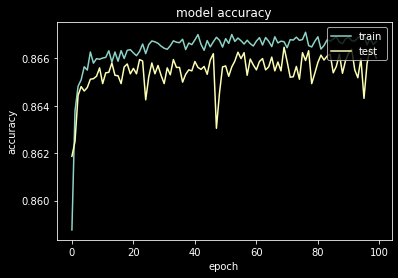

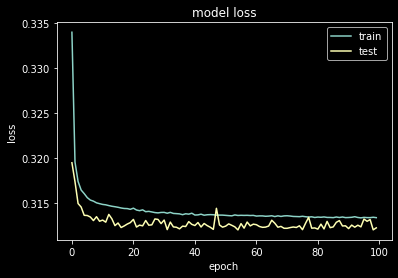

In [49]:
'''Visualizing Accuracy and Loss'''

import matplotlib.pyplot as plt

print(history.history.keys())

'''summarize history for accuracy'''
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


'''summarize history for loss'''
# loss - elbow shaped means model have achieved maximum accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

KNN

In [12]:
# Importing Libs
# Styling used for VSCode
from matplotlib import style
style.use('dark_background')

from sklearn.neighbors import KNeighborsClassifier

# Importing Data
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [13]:
# Preprocessing
X = data.iloc[:,1:-1]
y = data.iloc[:,0]

# from sklearn import preprocessing
# scaledX = preprocessing.normalize(X, axis=1)
# X = pd.DataFrame(scaledX, columns=X.columns)

In [14]:
# Split train and test : 5%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [146]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


In [147]:
avg = (1-np.array(error))*100
for i in range(0,20):
    print("If K = %d , then accuracy is %d%%" %(i+1,avg[i]))

If K = 1 , then accuracy is 80%
If K = 2 , then accuracy is 81%
If K = 3 , then accuracy is 83%
If K = 4 , then accuracy is 83%
If K = 5 , then accuracy is 84%
If K = 6 , then accuracy is 84%
If K = 7 , then accuracy is 84%
If K = 8 , then accuracy is 84%
If K = 9 , then accuracy is 85%
If K = 10 , then accuracy is 85%
If K = 11 , then accuracy is 85%
If K = 12 , then accuracy is 85%
If K = 13 , then accuracy is 85%
If K = 14 , then accuracy is 85%
If K = 15 , then accuracy is 85%
If K = 16 , then accuracy is 85%
If K = 17 , then accuracy is 85%
If K = 18 , then accuracy is 85%
If K = 19 , then accuracy is 85%
If K = 20 , then accuracy is 85%


[0.19615263323872595, 0.18763796909492272, 0.16682434563229265, 0.1652475559760328, 0.15830968148848942, 0.1553926206244087, 0.15137180700094607, 0.1512929675181331, 0.14955849889624723, 0.14979501734468623, 0.1477451907915484, 0.14656259854935352, 0.14632608010091455, 0.1467991169977925, 0.1456953642384106, 0.14490696941028067, 0.1456953642384106, 0.14419741406496372, 0.1445916114790287, 0.1434090192368338]
[0.19615263323872595, 0.18763796909492272, 0.16682434563229265, 0.1652475559760328, 0.15830968148848942, 0.1553926206244087, 0.15137180700094607, 0.1512929675181331, 0.14955849889624723, 0.14979501734468623, 0.1477451907915484, 0.14656259854935352, 0.14632608010091455, 0.1467991169977925, 0.1456953642384106, 0.14490696941028067, 0.1456953642384106, 0.14419741406496372, 0.1445916114790287, 0.1434090192368338]


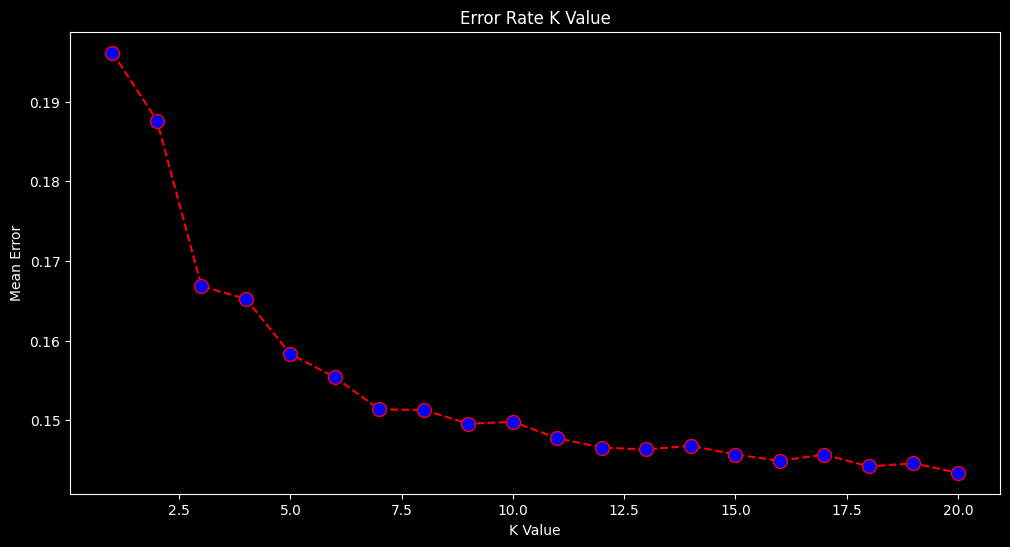

In [148]:
plt.figure(figsize=(12, 6))
print(error)
# error = np.array(error).astype(int)
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print(error)

In [15]:
#Training and Predictions with optimal parameter k=19
knnclassifier = KNeighborsClassifier(n_neighbors=17, weights = 'distance')
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17, weights='distance')

In [16]:
y_pred = knnclassifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
# Evaluating the Algorithm k =19

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10576   383]
 [ 1451   274]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     10959
         1.0       0.42      0.16      0.23      1725

    accuracy                           0.86     12684
   macro avg       0.65      0.56      0.58     12684
weighted avg       0.82      0.86      0.83     12684



Logistic Regression

In [18]:
#import libraries and data
from sklearn.linear_model import LogisticRegression
X = data.iloc[:,1:-1]
y = data.iloc[:,0]


In [19]:
#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [20]:
#training and fitting Logistic Regression to model
LGmodel = LogisticRegression(solver='liblinear', random_state=0)
LGmodel.fit(X_train,y_train)

#evaluating model
accuracy = LGmodel.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  86.55786818038473 %


In [21]:
print(LGmodel.intercept_)
print(LGmodel.coef_)

[-7.85389113]
[[ 0.75950432  0.56881067  1.16448051  0.06036671 -0.00416921  0.14690624
   0.23121415 -0.05078144 -0.0464596  -0.04890623 -0.77967037  0.02933775
   0.03392398  0.54834375 -0.00238444 -0.00722685  0.16466169  0.22326216
   0.12616148 -0.06684608]]


Text(0.5, 0, 'Importance')

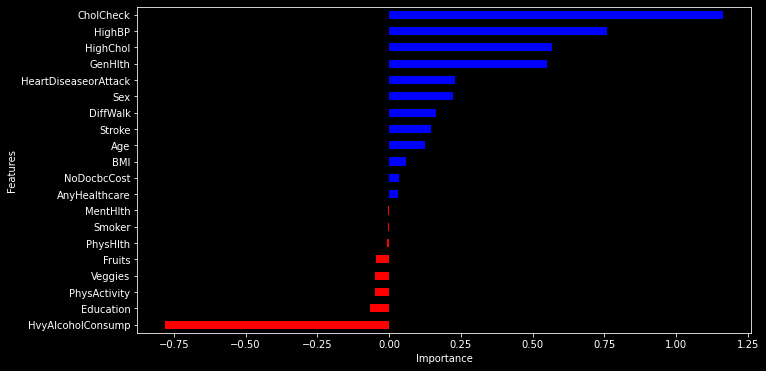

In [22]:
coeff = list(LGmodel.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [23]:
#making predictions
predictionProbability = LGmodel.predict_proba(X_test)
prediction = LGmodel.predict(X_test)
#shows probability of being zlass '0' and class '1'
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.96390025 0.03609975]
 [0.71168533 0.28831467]
 [0.99122501 0.00877499]
 ...
 [0.87317604 0.12682396]
 [0.99235595 0.00764405]
 [0.961486   0.038514  ]]
prediction: [0. 0. 0. ... 0. 0. 0.]


In [24]:
#Confusion Matrix and Classification Report of LG
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)
print(classification_report(y_test, prediction))

[[10706   253]
 [ 1452   273]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     10959
         1.0       0.52      0.16      0.24      1725

    accuracy                           0.87     12684
   macro avg       0.70      0.57      0.58     12684
weighted avg       0.83      0.87      0.83     12684



In [51]:

X = data.iloc[:,1:-1]
y = data.iloc[:,0]

from sklearn import metrics, preprocessing
scaledX = preprocessing.normalize(X, axis=1)
X = pd.DataFrame(scaledX, columns=X.columns)

'''Splitting dataset into training and testing dataset''' 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

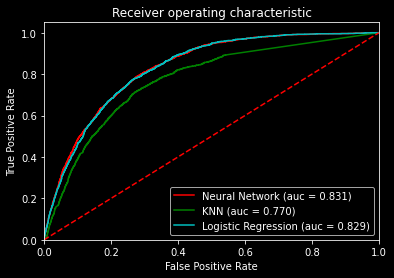

In [58]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
# Styling used for VSCode
from matplotlib import style
style.use('dark_background')


#ANN
X = data.iloc[:,1:-1]
y = data.iloc[:,0]
scaledX = preprocessing.normalize(X, axis=1)
X = pd.DataFrame(scaledX, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_pred = ann.predict(X_test).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
#KNN
# Split train and test : 5%
X = data.iloc[:,1:-1]
y = data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_pred_proba = knnclassifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
aucKNN = metrics.roc_auc_score(y_test, y_pred_proba)
#Logistic Regression
X = data.iloc[:,1:-1]
y = data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)
y_pred_proba = LGmodel.predict_proba(X_test)[::,1]
fprLG, tprLG, _ = metrics.roc_curve(y_test,  y_pred_proba)
aucLG = metrics.roc_auc_score(y_test, y_pred_proba)


plt.figure()
plt.plot(nn_fpr_keras, nn_tpr_keras,label='Neural Network (auc = %0.3f)' % auc_keras, color = 'r')
plt.plot(fpr,tpr,label="KNN (auc = %0.3f)" % aucKNN, color = 'g')
plt.plot(fprLG,tprLG,label="Logistic Regression (auc = %0.3f)" % aucLG, color = 'c')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

LG with class weights

In [7]:
from sklearn.linear_model import LogisticRegression
X = data.iloc[:,1:-1]
y = data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

In [8]:
#training and fitting Logistic Regression to model
LGmodel = LogisticRegression(solver='liblinear', random_state=0, class_weight= 'balanced')
LGmodel.fit(X_train,y_train)

#evaluating model
accuracy = LGmodel.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  72.95017344686218 %


In [9]:
#making predictions
predictionProbability = LGmodel.predict_proba(X_test)
prediction = LGmodel.predict(X_test)
#shows probability of being zlass '0' and class '1'
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.8362155  0.1637845 ]
 [0.27673509 0.72326491]
 [0.96269954 0.03730046]
 ...
 [0.55048641 0.44951359]
 [0.96769575 0.03230425]
 [0.815359   0.184641  ]]
prediction: [0. 1. 0. ... 0. 0. 0.]


In [10]:
#Confusion Matrix and Classification Report of LG
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)
print(classification_report(y_test, prediction))

[[7908 3051]
 [ 380 1345]]
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     10959
         1.0       0.31      0.78      0.44      1725

    accuracy                           0.73     12684
   macro avg       0.63      0.75      0.63     12684
weighted avg       0.87      0.73      0.77     12684

